
### If you have any questions, visit our website at:
### http://kianpaya.org or email at kianpaya.aero@gmail.com
  
# Sentiment Analysis Tool for Customer Reviews

## Project Overview
This repository hosts a sentiment analysis tool specifically designed to determine the sentiment—positive or negative—of customer reviews. It leverages advanced natural language processing (NLP) techniques to analyze text data, predict sentiments, and validate these predictions against the user scores provided in the reviews.

## Key Features
- **Sentiment Prediction**: This feature classifies the reviews into positive or negative categories based on their content.
- **Data Preprocessing**: Implements various NLP techniques such as tokenization, stopwords removal, and stemming to prepare the text data for analysis.
- **Model Training and Validation**: Utilizes a Long Short-Term Memory (LSTM)-based model which is trained and validated on a dataset split to ensure accuracy and reliability.
- **Accuracy Validation**: The tool includes a component that compares the model's predictions with actual user-provided scores to confirm its accuracy.

## Technologies Used
- **Python**: The primary programming language used for developing the tool.
- **TensorFlow**: Provides the backend for building and training the LSTM model.
- **Natural Language Toolkit (NLTK)**: Used for text preprocessing and manipulation.
- **Pandas**: Facilitates data handling and manipulation tasks.
- **Scikit-learn**: Used for additional machine learning tasks such as model training and data splitting.

## Getting Started
To get started with this tool, clone the repository and follow the instructions in the installation guide. Ensure you have all the necessary libraries installed and configure the environment according to the documentation provided.

## Contributing
Contributions to this project are welcome! Please refer to the contributing guidelines for more information on how to submit pull requests, report issues, or request new features.

## License
This project is licensed under the Data Vision License


In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("Reviews.csv")
data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [3]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kianp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [6]:
!pip install keras

Defaulting to user installation because normal site-packages is not writeable


In [7]:
!pip install --upgrade tensorflow


Defaulting to user installation because normal site-packages is not writeable


In [ ]:
!pip install keras-preprocessing

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/42.6 kB ? eta -:--:--
   ---------------------------------------- 42.6/42.6 kB 2.2 MB/s eta 0:00:00


In [42]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)
import nltk
from nltk.corpus import stopwords
stop_words=set(nltk.corpus.stopwords.words('english'))
from nltk import word_tokenize,sent_tokenize
import keras
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense , Flatten ,Embedding,Input
from keras.models import Model
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [10]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [11]:
data["Score"].value_counts()

Score
5    363122
4     80655
1     52268
3     42640
2     29769
Name: count, dtype: int64

In [12]:
scores = []
for i in range(1,5+1):
    b = data[data["Score"]==i]
    scores.append(len(b))
scores

[52268, 29769, 42640, 80655, 363122]

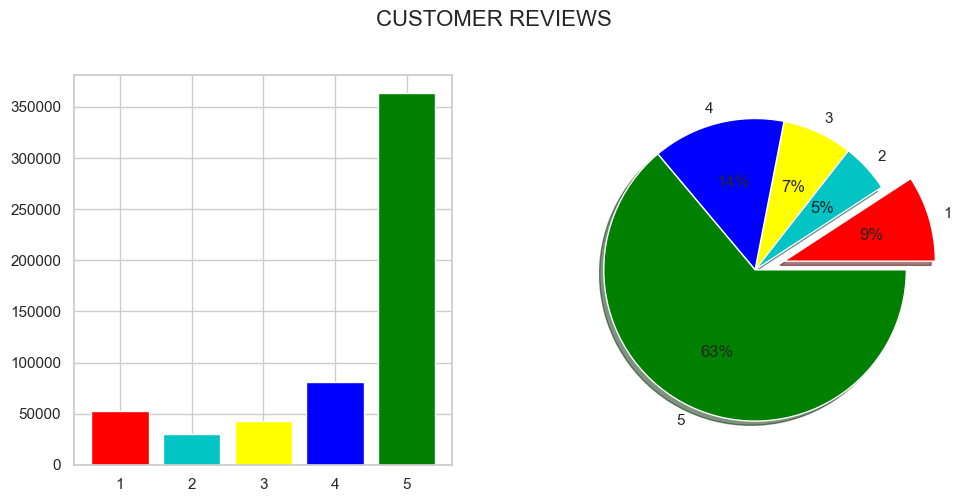

In [39]:
d = ["1" , "2" , "3" , "4" , "5"]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))  
color = ["red", "#02c4c4", "yellow", "blue", "green"]
ax1.bar(d, scores, color=color)


explode = [0.2 , 0.0 , 0.0 , 0.0 , 0.0]
ax2.pie(scores, labels=d , explode=explode , colors=color , autopct="%i%%" , shadow=True)


plt.suptitle("CUSTOMER REVIEWS", fontsize=16)
plt.subplots_adjust(top=0.85, wspace=0.3)  

plt.show()

In [18]:
data[data["Score"]==1]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
12,13,B0009XLVG0,A327PCT23YH90,LT,1,1,1,1339545600,My Cats Are Not Fans of the New Food,My cats have been happily eating Felidae Plati...
26,27,B001GVISJM,A3RXAU2N8KV45G,lady21,0,1,1,1332633600,Nasty No flavor,"The candy is just red , No flavor . Just plan..."
50,51,B001EO5QW8,A108P30XVUFKXY,Roberto A,0,7,1,1203379200,Don't like it,"This oatmeal is not good. Its mushy, soft, I d..."
62,63,B001EO5TPM,A1E09XGZUR78C6,gary sturrock,2,2,1,1215302400,stale product.,Arrived in 6 days and were so stale i could no...
...,...,...,...,...,...,...,...,...,...,...
568402,568403,B001EQ5O6Y,A1A3H22VVZYUKW,msfreixy,1,3,1,1187049600,alternative sweetner,"I was disappointed in this product, as I had r..."
568426,568427,B001FPT1WM,A2F25C6QCKJ3HL,Jill,1,1,1,1341532800,rip off,"The candy is tasty, but they totally scam you ..."
568431,568432,B003XUL27E,A32Y0419QFGVHM,Kevin Mitchell,0,0,1,1319673600,Mostly water,Definitely not worth buying flavored water wit...
568432,568433,B003XUL27E,A1YKXVGAIA8952,NC65,0,0,1,1319500800,No Good,I thought this soup would be more like a chill...


In [19]:
data[data["Score"]==1]["Text"]

1         Product arrived labeled as Jumbo Salted Peanut...
12        My cats have been happily eating Felidae Plati...
26        The candy is just red , No flavor . Just  plan...
50        This oatmeal is not good. Its mushy, soft, I d...
62        Arrived in 6 days and were so stale i could no...
                                ...                        
568402    I was disappointed in this product, as I had r...
568426    The candy is tasty, but they totally scam you ...
568431    Definitely not worth buying flavored water wit...
568432    I thought this soup would be more like a chill...
568433    I just bought this soup today at my local groc...
Name: Text, Length: 52268, dtype: object

In [40]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [41]:
reviews = data["Summary"]
reviews

0                      Good Quality Dog Food
1                          Not as Advertised
2                      "Delight" says it all
3                             Cough Medicine
4                                Great taffy
                         ...                
568449                   Will not do without
568450                          disappointed
568451              Perfect for our maltipoo
568452    Favorite Training and reward treat
568453                           Great Honey
Name: Summary, Length: 568454, dtype: object

In [44]:
reviews.info()

<class 'pandas.core.series.Series'>
RangeIndex: 568454 entries, 0 to 568453
Series name: Summary
Non-Null Count   Dtype 
--------------   ----- 
568427 non-null  object
dtypes: object(1)
memory usage: 4.3+ MB


In [47]:
nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    try:
        tokens = word_tokenize(text.lower())
        tokens = [word for word in tokens if word.isalpha()]  # Remove punctuation
        tokens = [word for word in tokens if word not in stopwords.words('english')]
        stemmer = PorterStemmer()
        tokens = [stemmer.stem(word) for word in tokens]
        return ' '.join(tokens)
    except:
        pass

# reviews = reviews.apply(preprocess_text)
reviews.apply(preprocess_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kianp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kianp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0              good qualiti dog food
1                           advertis
2                        delight say
3                      cough medicin
4                        great taffi
                     ...            
568449                       without
568450                    disappoint
568451              perfect maltipoo
568452    favorit train reward treat
568453                   great honey
Name: Summary, Length: 568454, dtype: object

In [48]:
reviews = reviews.apply(preprocess_text)

In [57]:
reviews = reviews.fillna("good")

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
features = vectorizer.fit_transform(reviews)


In [52]:
data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


data['label'] = data['Score'].apply(lambda x: 1 if x > 3 else 0)

X_train, X_test, y_train, y_test = train_test_split(features, data["label"], test_size=0.25, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [60]:
from sklearn.metrics import classification_report

predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.53      0.63     30913
           1       0.88      0.96      0.92    111201

    accuracy                           0.87    142114
   macro avg       0.83      0.75      0.78    142114
weighted avg       0.86      0.87      0.86    142114



In [72]:
def predict_sentiment(review):
    review_processed = preprocess_text(review)
    review_features = vectorizer.transform([review_processed])
    prediction = model.predict(review_features)
    return 'Positive' if prediction[0] == 1 else 'Negative'


print(predict_sentiment("Don't fall for the beautiful packaging. This product is not reliable at all"))

Positive


In [69]:
print(predict_sentiment("I don't even know what I wanted when I ordered this product. It was when I was stressed out and had to order something"))

Negative


In [70]:
print(predict_sentiment("I wasn't really expecting too much from this product but it turned out to be better than I thought"))

Negative


In [71]:
print(predict_sentiment("Don't fall for the beautiful packaging. This product is not reliable at all"))

Positive
